# Lab 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Import and process data

In [3]:
data_train = pd.read_csv('train_motion_data.csv')
data_test = pd.read_csv('test_motion_data.csv')

In [4]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
train_mask = is_number(data_train.dtypes)
test_mask = is_number(data_train.dtypes)

print('No gaps' if pd.api.types.is_numeric_dtype(data_train) and pd.api.types.is_numeric_dtype(data_test) else 'Replace some data in column', data_train.columns[~train_mask], data_test.columns[~test_mask])

Replace some data in column Index(['Class'], dtype='object') Index(['Class'], dtype='object')


Replace data that first column will be a Class data

In [5]:
data_train = data_train[['Class'] + [x for x in data_train.columns if x != 'Class']]
data_test = data_test[['Class'] + [x for x in data_test.columns if x != 'Class']]

Separate data for their classes

In [6]:
train_normal = data_train.loc[data_train['Class'] == 'NORMAL']
train_slow = data_train.loc[data_train['Class'] == 'SLOW']
train_aggressive = data_train.loc[data_train['Class'] == 'AGGRESSIVE']

test_normal = data_test.loc[data_test['Class'] == 'NORMAL']
test_slow = data_test.loc[data_test['Class'] == 'SLOW']
test_aggressive = data_test.loc[data_test['Class'] == 'AGGRESSIVE']

Delete some data in swiching mode period

In [7]:
Trash = 10

train_slow = train_slow.iloc[Trash:]
train_slow = train_slow.iloc[:-Trash]

test_slow = test_slow.iloc[Trash:]
test_slow = test_slow.iloc[:-Trash]

train_normal = train_normal.iloc[Trash:]
train_normal = train_normal.iloc[:-Trash]

test_normal = test_normal.iloc[Trash:]
test_normal = test_normal.iloc[:-Trash]

train_aggressive = train_aggressive.iloc[Trash:]
train_aggressive = train_aggressive.iloc[:-Trash]

test_aggressive = test_aggressive.iloc[Trash:]
test_aggressive = test_aggressive.iloc[:-Trash]

In [8]:
data_train.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


### Separating for traning and test dataset

In [9]:
X_train = data_train.iloc[:, 1:7]
Y_train = data_train.iloc[:, 0]
X_test = data_test.iloc[:, 1:7]
Y_test = data_test.iloc[:, 0]

In [10]:
labelencoder_X = LabelEncoder()
labelencoder_Y = LabelEncoder()

Y_train = labelencoder_Y.fit_transform(Y_train) 
Y_test = labelencoder_Y.transform(Y_test) 

In [11]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_test, Y_test = shuffle(X_test, Y_test, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [13]:
Y_train

array([1, 2, 2, ..., 1, 2, 2])

# Principal component analysis

In [27]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

pca = PCA()
X_pca = pca.fit_transform(X_std)

In [28]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

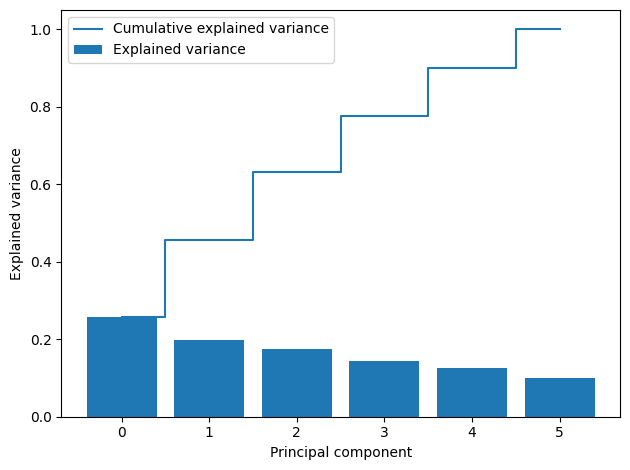

In [29]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
y = Y_train

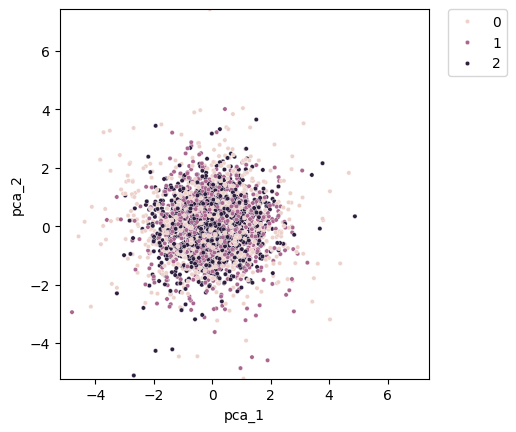

In [35]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min(), pca_result.max())
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# t-distributed Stochastic Neighbor Embedding

C:\Users\penai\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\penai\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


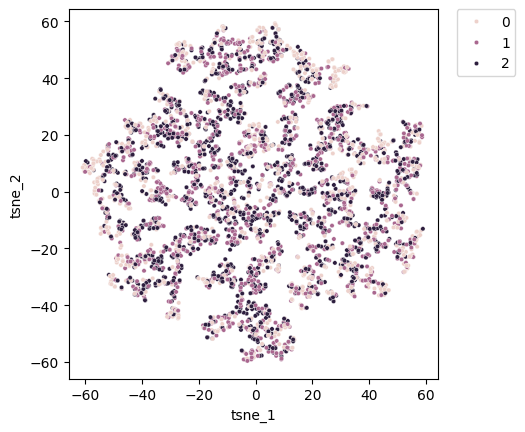

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_train)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Color clustering

In [46]:
import cv2
from skimage.io import imread
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
n_colors = 64
snap =  imread('composite.jpg')
snap = np.array(snap, dtype=np.float64) / 255
unique_colors=len(np.unique(snap))

In [47]:
w, h, d = original_shape = tuple(snap.shape)
image_array = np.reshape(snap, (w * h, d))

In [48]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

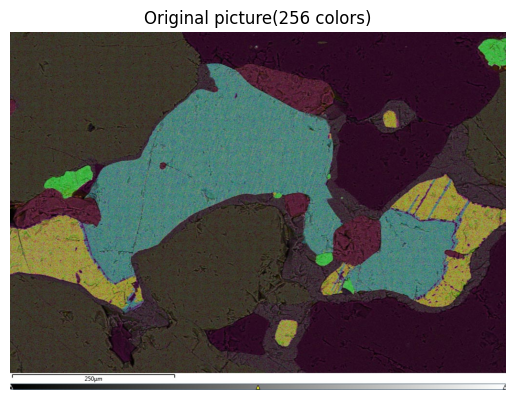

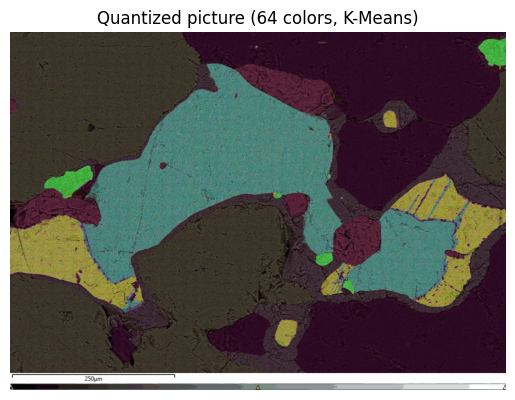

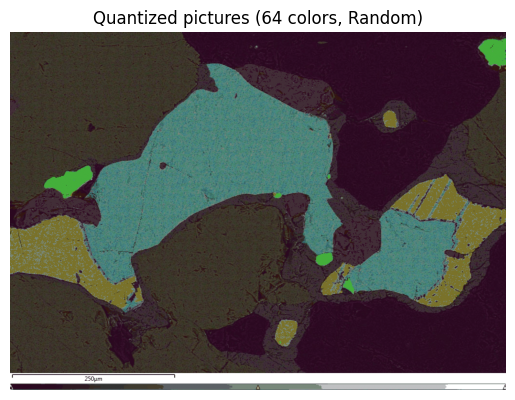

In [50]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original picture({unique_colors} colors)")
plt.imshow(snap)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized picture ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized pictures ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

# Text analys